# YouTube Text Data Analysis

## A) Performing Sentiment Analysis on youtube Comments

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
videos = pd.read_csv('C:/Users/Pranav/Desktop/resue/DataAnaly)
videos = videos.loc[:, ~videos.columns.str.contains('^Unnamed')]sis/youtube1/UScomments.csv',error_bad_lines=False
videos.head()

C:\Users\Pranav\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,3,4,5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [37]:
!pip  install textblob

You should consider upgrading via the 'C:\Users\Pranav\anaconda3\python.exe -m pip install --upgrade pip' command.

In [38]:
from textblob import TextBlob

In [39]:
TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity

0.0

In [40]:
polarity=[]
for i in videos['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [41]:
videos['polarity']=polarity

In [42]:
videos.head(20)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   
14  XpVt6Z1Gjjo      aw geez rick this guy is the face of YouTube.     0   
15  XpVt6Z1Gjjo                       He happy cause he in a movie     0   
16  XpVt6Z1Gjjo  Ayyyyoooo Logang what up .  This was a hard vl...     1   
17  XpVt6Z1Gjjo  Bro y didnt u give merch to johannes he is ur ...     0   
18  XpVt6Z1Gjjo  It's been fun watching you grow. I'm at 42 day...     3   
19  XpVt6Z1Gjjo             Made a lot of people hate youtube - GJ     0   

   replies  polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000  
14       0  0.000000  
15       0  0.800000  
16       0 -0.291667  
17       0  0.000000  
18       0  0.250000  
19       0 -0.800000

## B) Wordcloud representation of Sentiments

Performing EDA for Positive Comments

In [48]:
comments_positive=videos[videos['polarity']==1]
comments_positive.head()

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [50]:
!pip install wordcloud

In [51]:
from wordcloud import WordCloud,STOPWORDS

In [54]:
total_comments = (''.join(comments_positive['comment_text']))
len(total_comments)

827197

(-0.5, 999.5, 499.5, -0.5)

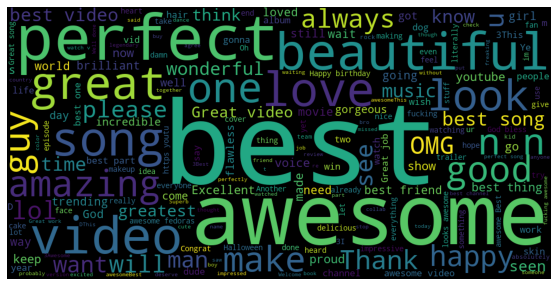

In [62]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Performing EDA for Negative Comments

In [65]:
comments_negative=videos[videos['polarity']==-1]
comments_negative.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [66]:
total_comments = (''.join(comments_negative['comment_text']))
len(total_comments)

187280

(-0.5, 999.5, 499.5, -0.5)

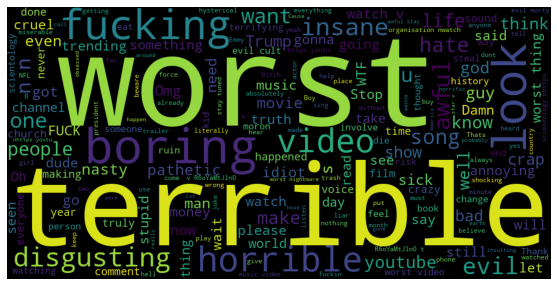

In [67]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

## C) Analyze Trending Tags and Views of YouTube

Analysing Tags column, what are trending tags on youtube ?

In [74]:
videos2 = pd.read_csv(r'C:/Users/Pranav/Desktop/resue/DataAnalysis/youtube1/USvideos.csv',error_bad_lines=False)
videos2.head()

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [78]:
tags_complete=(' '.join(videos2['tags']))
videos2['tags'][0]

'logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life'

In [81]:
!pip install re


ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [80]:
import re

In [82]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete) 
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [83]:
tags=re.sub(' +',' ',tags)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

(-0.5, 999.5, 499.5, -0.5)

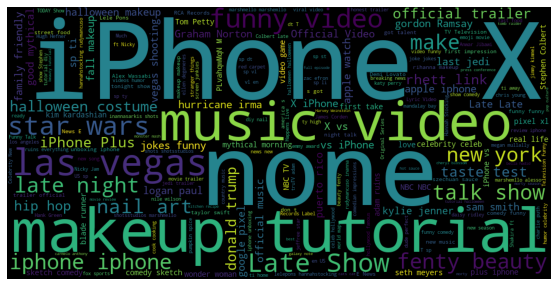

In [84]:
#trending text of Youtube
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Performing analysis on likes, views & dislikes and finding how they are corelated 

Text(0.5, 1.0, 'Regression plot for likes vs views')

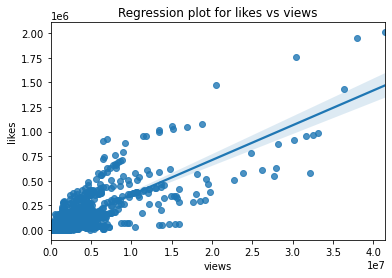

In [86]:
#regression plot for likes vs views
sns.regplot(data=videos2,x='views',y='likes')
plt.title("Regression plot for likes vs views")

Text(0.5, 1.0, 'Regression plot for dislikes vs views')

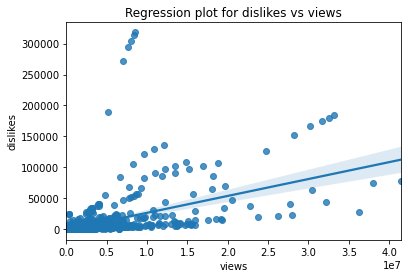

In [87]:
sns.regplot(data=videos2,x='views',y='dislikes')
plt.title("Regression plot for dislikes vs views")

views   likes  dislikes
0  4394029  320053      5931
1  7860119  185853     26679
2  5845909  576597     39774
3  2642103   24975      4542
4  1168130   96666       568

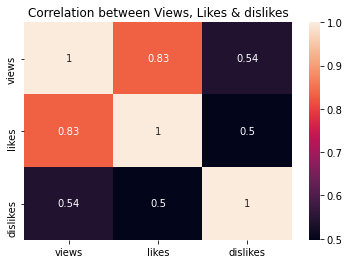

In [141]:
#checking likes views and dislikes are co-related or not
#creating Heat map
df_corr=videos2[['views','likes','dislikes']]
sns.heatmap(df_corr.corr(),annot=True)
plt.title("Correlation between Views, Likes & dislikes")
df_corr.head()


## D) Performing Emojis Analysis

In [91]:
videos.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [92]:
!pip install emoji

  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49720 sha256=70ed2c41970f2635b3e9fa3c7ccc85d0e7249f5dbe36cfe3eedb0eb1496ae24e
  Stored in directory: c:\users\pranav\appdata\local\pip\cache\wheels\43\3d\82\e7baffa5e86346c6178d7750dba6e8ef063282a37fc563f8f8
Successfully built emoji


In [107]:
import emoji

In [108]:
#checking missing values
videos['comment_text'].isna().sum()



25

In [109]:
len(videos['comment_text'])

691407

In [110]:
videos['comment_text'][4]

'trending 😉'

In [111]:
'\U0001F600'

'😀'

In [112]:
comment='trending 😉'
[c for c in comment if c in emoji.UNICODE_EMOJI]

['😉']

In [115]:
str=''
for i in videos['comment_text']:
    list=[c for c in [i] if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str=str+ele

In [116]:
print(str)

👍❤️😂❤️💄🖤💕😒👎🏽🐘💕😎🇺🇸🙏🇺🇸🇺🇸🌞💜😱💕🎈👍😕😻💄💦❤️❤😅💜🤴🏻😍💯❤😑💖❤🙏🏽♥️😂❤️😭💛😝😍❤😍💝👌🌞✌🏻😒👎🏽😂🇺🇸🙏🇺🇸🇺🇸💜😱🎈👍😴👍👍👍❤👍🔥💯🐍🐍😍👍😂👍❤💩😍👍😍💞♥️😻♥😂😃😴👍👍👍❤👍🔥💯🐍🐍😍👍😂👍❤💩😍👍😍💞♥️😻♥😂😃👍🤘🏾👍🙄😂👍👍🎢❤️👍🏾😂😍👍❤❤👌🤢🔥❤️😍🤗😢👍🔥👑😍👍💯❤🐍🐍💞♥️😂😀👌😍👍🤦🏾‍♂️💋👋👍😂❤😍❤️😭😍❤️❤💚♥👍🖤💚❤️💿❤️🥀👁😀😂👍🇩🇴❤❣️🔥🔥👑❤❤💛👌🏾🤢👍💚😍❤️🔥😢❤👍💯💖💞♥️🐍🐍👍😇❤️❤️👍🙌😄💕❤👍😎😛💋💯✌❤👍👌😱💖👍😂😂❤❤🎈🎈😍👁🔥👑😳❤💓💛😂👍🎈🤢💟❤️😍🔥❤❤💚🔥👍👍💯🐍🐍💞♥️🙌❤️😕😂😛👍😇😂❤💯👍❤❤👌👍😭❤️💙❤️😄🤢😍😍🤖🇧🇷😍♥😦🎈💖😄👌❤😍❤️❤👍😂🔥👑❤️🎈🎈👍😢🤢💚💟😌❤🔥🔥❤❤❤🙌👎😕👍😇🤥❤❤️🖕🏻😐❤️❤️💄💄🙏😄😀😂❤️😘🐍👍❤💖🌌👍😦😄😊😍❤😂👍🔥👑❤️❤️🎈👍🔥😢🤢😂😭🐢❤️👍🇦🇷🎩👍🇦🇷🎩🔥😢💗❤🙏😄💖👍♥💄🐍❤️😘🐍👍☺😊💀😄😦😄😂😍🙄😂🙁😑😒♥️👍😢😭🎩😂😂❤️😍😞🖤❤️😂🙏😄❤️👍💖❤❤️💄❤️🐍🐍🐍😊👍☺😊😦😍❤️😍🔥♥❤️😔💖🙌🔥♥😍💙❤️❤😍🎈🎈💖💜🙁❤👌🐽❤️💙❤♥️♥❤💯🔥😑😒💎♥♥😩😭😊😲😂😂😎❤❤️😂❤️👍💖😲😂❤️💟😍🙀😂😍😱🙌🔥💜💙💖😍❤️🎈🎈❤💜❤💯🙏🏼👌😂❤🙁🐽❤️👌♥❤😑😒🥀♥️💎😊🤚💕❤️😑😻😎🇹🇷😍❤👍🙌💕🥇😪🤙🏻❄️😆💋♥️😍😍💙🖕🏿😘❤❤🎈🎈❤😍💯🙏🏼🤣❤😂👏💞😍🙌😕💜🙁👍🏽👌😍🐽😑😒♥❤♥️😂🖖😂😍❤️🍻😨😻😂💕🥇❤💋♥👍🙌🙌😻🖕🏿❤😍😘❤️❤️❣🎈😍❤️❤😂🤣👏🙏🏼💯♥️💜🕊😍👍🏽👌❤🙁😍♥❤😑😒🐽😱❤😻😂❤️🌲🎷😳👌😎❤❤️👎🏼😢😭😉❤🇺🇸💕❤😨🎈👍👌🏽💕🥇🙄😻💋♥❤👍😍🚀❤️❤🦊🔥👍🏻🇬🇭😂😈💜👍😂🔥😍👍👌😂😁👎🏼👌😎😢😢❤😉🇺🇸💗❤️❤🙋🎈😊🤑😂😍👍😂❤️💖♥😍👍❤♥💜🤙🏻❤❤️♥🙄❤❤❤️😍❤️👍😂😀👌😁👌😎👎🏼👍😢🐍😢😍❤️❤👍😮🕳🙇❤😍❤💖😂❤️❤❤️❤️😍🤗💖💙♥🌷😍🤣😂😂💪🏽😁♥😆💕❤❤️💜🤘👍👌❤️🖤😂😗💩😇😐🕶💎💚🐱😍👃😂❤💗😂💖😱❤️💖❤😂🙇❤😍❤💜❤️❤️💙😍💘💜🌷💖❤😍❤🤣😂👌❤️❤️😏💪🏽❤️❤❤️👋❤👀🤙😂✔️💚👏👍😺❤️💓😔😂😍😂🙇❤😍❤💜❤✊💜❤️💙😝❤💖❤❤️🤣😂😊😍❤💪🏽❤️❤️😍👋💔😥❤️🐘😒👍❤️👀💙👍😂👍😂😢👍😭👏👍❤😺🐱👍😍👍🙇❤😍❤😊💙👍💜❤❤

In [117]:
len(str)

1875

In [118]:
len(set(str))

199

In [120]:
res={i:str.count(i) for i in set(str)}
res

{'🏾': 11,
 '👨': 1,
 '🐶': 1,
 '💩': 7,
 '🙊': 1,
 '😅': 1,
 '🤦': 5,
 '✊': 1,
 '🎈': 21,
 '😞': 2,
 '🇱': 2,
 '☠': 1,
 '❤': 312,
 '🎷': 1,
 '♂': 5,
 '🌌': 1,
 '👋': 3,
 '🐸': 5,
 '🇬': 1,
 '🇺': 9,
 '🥁': 4,
 '🥇': 3,
 '🔧': 1,
 '😙': 2,
 '🤤': 1,
 '🐐': 14,
 '💟': 8,
 '🍻': 1,
 '🤙': 3,
 '🌲': 1,
 '🤥': 1,
 '🇸': 9,
 '🤡': 7,
 '👀': 3,
 '🐉': 1,
 '🐝': 1,
 '✨': 1,
 '💕': 21,
 '❄': 1,
 '🥜': 1,
 '😂': 90,
 '🙃': 2,
 '😔': 6,
 '💞': 7,
 '👅': 1,
 '🔑': 1,
 '💖': 38,
 '😮': 4,
 '🎃': 4,
 '🇨': 1,
 '🧢': 1,
 '😝': 3,
 '🇦': 3,
 '😕': 6,
 '🙄': 4,
 '💃': 1,
 '🙇': 5,
 '👽': 1,
 '🤖': 1,
 '👑': 6,
 '💀': 1,
 '🍷': 1,
 '🤴': 1,
 '🙌': 12,
 '💗': 12,
 '🐾': 5,
 '🐙': 2,
 '💥': 1,
 '🎢': 1,
 '🙋': 1,
 '🙀': 1,
 '🕊': 1,
 '🇹': 1,
 '😦': 5,
 '😐': 10,
 '😏': 2,
 '🤘': 6,
 '😭': 12,
 '💝': 2,
 '🔥': 28,
 '🎣': 1,
 '😌': 1,
 '😀': 14,
 '😴': 7,
 '💜': 28,
 '👻': 2,
 '▫': 1,
 '🐍': 23,
 '♥': 56,
 '🥀': 2,
 '💪': 3,
 '☺': 2,
 '😄': 10,
 '🖖': 1,
 '💔': 10,
 '😬': 2,
 '💚': 9,
 '🤞': 1,
 '😋': 4,
 '🇷': 7,
 '🖕': 10,
 '🐱': 3,
 '🤚': 1,
 '🇿': 1,
 '🏽': 12,
 '🙏': 15,
 '😑': 9,
 '💁': 2,
 '💛': 

In [125]:
res={k:v for k,v in sorted(res.items(),key=lambda item:item[1])}
res

{'👨': 1,
 '🐶': 1,
 '🙊': 1,
 '😅': 1,
 '✊': 1,
 '☠': 1,
 '🎷': 1,
 '🌌': 1,
 '🇬': 1,
 '🔧': 1,
 '🤤': 1,
 '🍻': 1,
 '🌲': 1,
 '🤥': 1,
 '🐉': 1,
 '🐝': 1,
 '✨': 1,
 '❄': 1,
 '🥜': 1,
 '👅': 1,
 '🔑': 1,
 '🇨': 1,
 '🧢': 1,
 '💃': 1,
 '👽': 1,
 '🤖': 1,
 '💀': 1,
 '🍷': 1,
 '🤴': 1,
 '💥': 1,
 '🎢': 1,
 '🙋': 1,
 '🙀': 1,
 '🕊': 1,
 '🇹': 1,
 '🎣': 1,
 '😌': 1,
 '▫': 1,
 '🖖': 1,
 '🤞': 1,
 '🤚': 1,
 '🇿': 1,
 '🚀': 1,
 '🦌': 1,
 '☹': 1,
 '™': 1,
 '🌶': 1,
 '🤑': 1,
 '😪': 1,
 '🕳': 1,
 '👆': 1,
 '✋': 1,
 '😩': 1,
 '🍪': 1,
 '✔': 1,
 '🌬': 1,
 '🍆': 1,
 '☄': 1,
 '🐦': 1,
 '🍈': 1,
 '🇴': 1,
 '😹': 1,
 '🤓': 1,
 '🇪': 1,
 '👃': 1,
 '🕶': 1,
 '🅱': 1,
 '😵': 1,
 '🦊': 1,
 '😧': 1,
 '💦': 1,
 '🇭': 1,
 '😞': 2,
 '🇱': 2,
 '😙': 2,
 '🙃': 2,
 '🐙': 2,
 '😏': 2,
 '💝': 2,
 '👻': 2,
 '🥀': 2,
 '☺': 2,
 '😬': 2,
 '💁': 2,
 '💿': 2,
 '😆': 2,
 '🌞': 2,
 '😛': 2,
 '🌷': 2,
 '❣': 2,
 '🦄': 2,
 '👁': 2,
 '😥': 2,
 '🐘': 2,
 '🤔': 2,
 '😃': 2,
 '😈': 2,
 '😜': 2,
 '👋': 3,
 '🥇': 3,
 '🤙': 3,
 '👀': 3,
 '😝': 3,
 '🇦': 3,
 '💪': 3,
 '🐱': 3,
 '🏿': 3,
 '😺': 3,
 '🎩': 3,
 '🇩': 3,
 '💎': 3,
 

In [127]:
keys=[*res.keys()]
values=[*res.values()]

In [128]:
keys[0]

'👨'

In [130]:
df=pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})
df

chars  num
0      😊   14
1      🙏   15
2      💯   15
3      😢   19
4      🏻   19
5      💓   20
6      💙   20
7      🎈   21
8      💕   21
9      🐍   23
10     👌   24
11     🔥   28
12     💜   28
13     💖   38
14     ♥   56
15     😂   90
16     😍  120
17     👍  130
18     ️  189
19     ❤  312

In [136]:
!pip install plotly


In [137]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [153]:
trace = go.Bar(x=df['chars'],
               y=df['num'])
iplot([trace])

